##   Customer Churn Prediction

### Business Understanding
-The objective of the project is to build a Machine Learning Model that will be able to predict the likelihood of a customer churn from the organization.

### Project Description
-Customer retention is fundamental to the success of any Business. However, churn is the aspect of customer leaving or stopping to consume given products/services leading to loss of revenue and wastage of funds in expenditure to acquire new ones through advertising or endosements.

-It is in light of the above that this project seeks to utelize data analysis and Machine learning to be able to foresee what is likely to cause the churn and mitigate it so as to ensure customer retention and market dominance.

### Questions
-Is there a relationship between the cost of products/services with churn?
-How does tenure affect churn?
-How many customers have churnned?
-Is age a factor in charning?
-Does gender play a role in likelihood of churning?
-How does having dependants(family size) affect churning?

## HYPOTHESIS
-Ho: There is no direct relationship between cost and churning
-H1: Cost plays a significant role on customer churn



## DATA UNDERSTANDING

In [552]:
#for data manipulation
import pyodbc
import os
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings

#for visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go


warnings.filterwarnings('ignore')

#for Feature Engineering
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif  # Univariate Selection using KBest
from sklearn.model_selection import *  #cross_val_score, fbeta_score, KFold, make_scorer, train_test_split, RandomizedSearchCV
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#for models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier, AdaBoostClassifier



# Model evaluation
from sklearn import metrics
from sklearn.metrics import *


In [553]:
for driver in pyodbc.drivers():
    print(driver)

SQL Server
SQL Server Native Client RDA 11.0
ODBC Driver 17 for SQL Server
ODBC Driver 18 for SQL Server


In [554]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv(".env")

# Access environment variables using os.environ.get()
server = os.environ.get("SERVER")
database = os.environ.get("DATABASE")
username = os.environ.get("USERNAME")
password = os.environ.get("PASSWORD")


In [555]:
import pandas as pd
import pyodbc  # Assuming you're using ODBC for SQL Server

# Establish a connection to your SQL Server
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
connection= pyodbc.connect(connection_string)
# Execute your query
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"


In [556]:
def df(query):
    # Implementation of the df function

 result = df(query)


In [557]:
data1 = pd.read_sql(query, connection)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [558]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [559]:
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [560]:
data1.duplicated().sum()

0

In [561]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


### Importing the other datasets and concatenationg the train data

In [562]:
data2= pd.read_csv("C:/Users/lucky/Desktop/LP2/Customer-Churn/Data/LP2_Telco-churn-second-2000 (1).csv")
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [563]:
#merging/ the two
df = pd.concat([data1, data2], axis=0,ignore_index=True)

In [564]:
df.to_csv('train_data.csv')

## EDA on Merged Dataset

In [565]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [566]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

### Observations and assumptions

-Multiple lines(269), the assumption is that this are people who didn't have the service therefore no lines. Fill with -No

-For online packages(651), the assumption is that,they had no internet subscription thus no need for those services. Settle with -No

-Total charges(5), these might be subscribers who did last a month so fill with avarage monthly charge.

-The monthly and total charges will be assumed to be in US Dollars.

-ID column is not useful so will be dropped

In [567]:
#Filing the -No needed colums
colm_to_fill=['MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 'StreamingTV','TechSupport', 'StreamingMovies']
for items in colm_to_fill:
    if df[items].isna().any()==True:
        df[items]=df[items].fillna('No')


In [568]:
#Total charges colums with avarage of monthly charges
#masking the totalcharges column
mask = df['TotalCharges'].isna()
min_monthly_charge = df.loc[mask, 'MonthlyCharges'].mean()  # Get the minimum value of MonthlyCharges /TotalCharges is NaN
df['TotalCharges'].fillna(min_monthly_charge, inplace=True)


In [569]:
#Filling the churn column with the mode
churn_mode=df['Churn'].mode()[0]
df['Churn']=df['Churn'].fillna(churn_mode)

Confirming Changes have been affected

In [570]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [571]:
#Converting True/false to Yes/No for uniformity
df.replace({True:'Yes',False:'No'}, inplace=True)

In [572]:
#lastly converiting total charges from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


Creating list for numeric and categorical colums in the dataset.

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [574]:
# Dropping the customer ID colimn
df.drop(columns=['customerID'], inplace=True)


In [575]:
df.to_csv('train_data.csv')

In [576]:
#numeric columns list
numeric=[]
for column in df.columns:
    if df[column].dtype !="O":
        numeric.append(column)
numeric

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [577]:
#Categoricals
categorical=[]
for column in df.columns:
    if df[column].dtype =="O":
        categorical.append(column)
categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Univariant Analysis

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

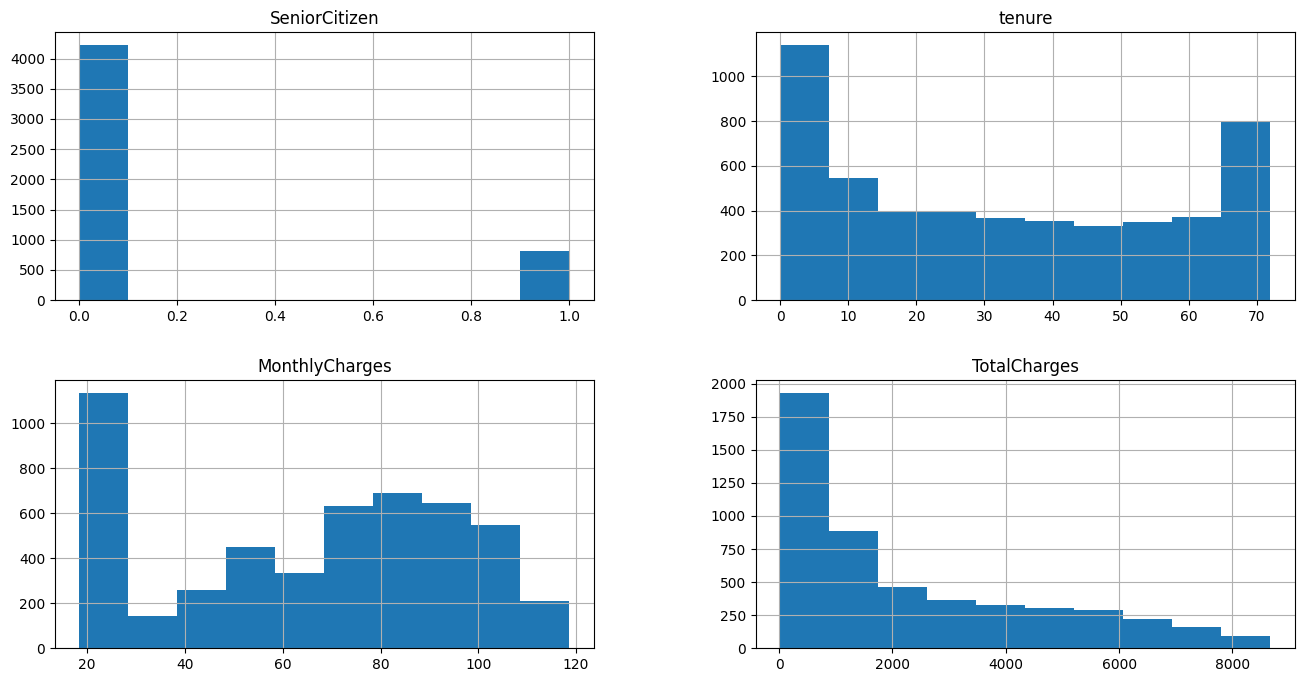

In [578]:
df.hist(figsize=(16,8))

-Majority are non senior-citizens constituiting about 4500,while senior citizens are appoximately 800. 

-On tenure, 0-8 months are the majority over 1000,however 15-65 months has significant number of people, the figure shoots up againg between 66-70 months.

-Fewer people are found where there is high monthly charges, avarage charges has the majority of the population.

### Bivariant Analysis

In [579]:
#Visualizing the categorical columns distribution
import plotly.express as px
train_data=df
figsize = (800, 600)
for column in categorical:  
    fig = px.histogram(train_data, x=train_data[column],text_auto=True, color=df["Churn"], title=f"Value Distribution in {column} by churn status")
    fig.update_layout(width=figsize[0], height=figsize[1])
    fig.show()


### Summery observations
1. Gender plays a very negligible role in churn likelihood.
2. Those with partners/dependants are less likely to churn out probably because the subscription is not for thier personal consumption.
3. Those using fibre are 3 times more likely to churn than those with Dsl. Could be cost or reliability?
4. For internet services(online security,backup and the likes), those with no buckup,security or techsupport are more likely to churn.
5. Those with short contracts are 10 times likely to churn than those with longer one. Cost? probably.

### Correlations
-

In [580]:
#correlation matrix
corr_matrix=df.corr(numeric_only=True)
fig=px.imshow(corr_matrix, text_auto=True, width=1000,height=600)
fig.show()

-SeniorCitizen has a positive correlation to total charges of close to 0.1

-Tenure has 0.8 meaning closely dependent upon total charges as well as monthly charges at 0.6, the longer the tenure the higher the monthly charges and ultimately total charges.

-

Multi-variate analysis

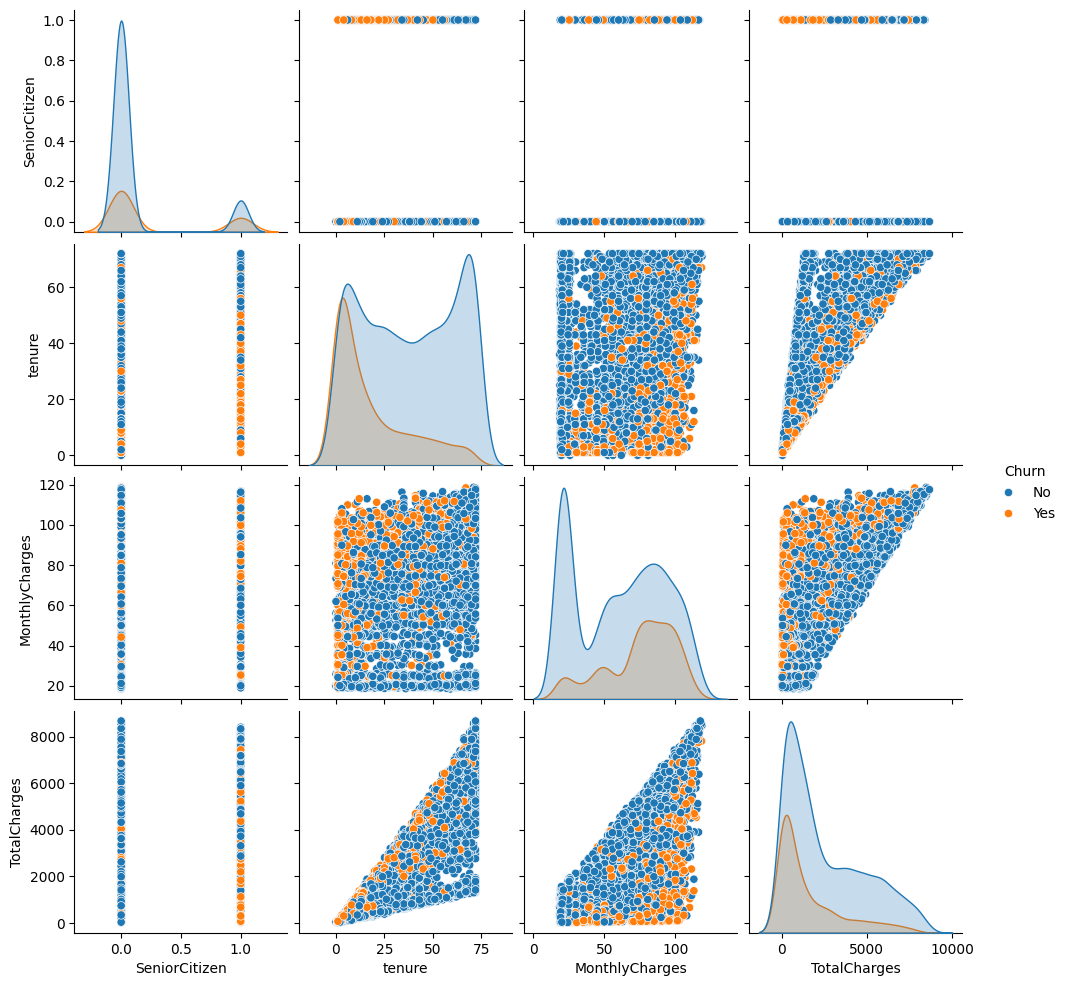

In [581]:
#visualizing 
sns.pairplot(train_data, hue='Churn', diag_kind='kde')
plt.show()

## Answering the questions

### Q How does tenure affect churn?

In [582]:
#creating a function to group tenure in years
def tenure_groups(df):
    if df.tenure <= 12:
        return "less_than_1"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"

In [583]:
#Now that we've grouped tenure in years,we can plot 
def tenure_group_counts(df):
    plt.figure(figsize = (16,8))
    t = sns.countplot(data = df, x = 'grouped_tenure', hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    t.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()

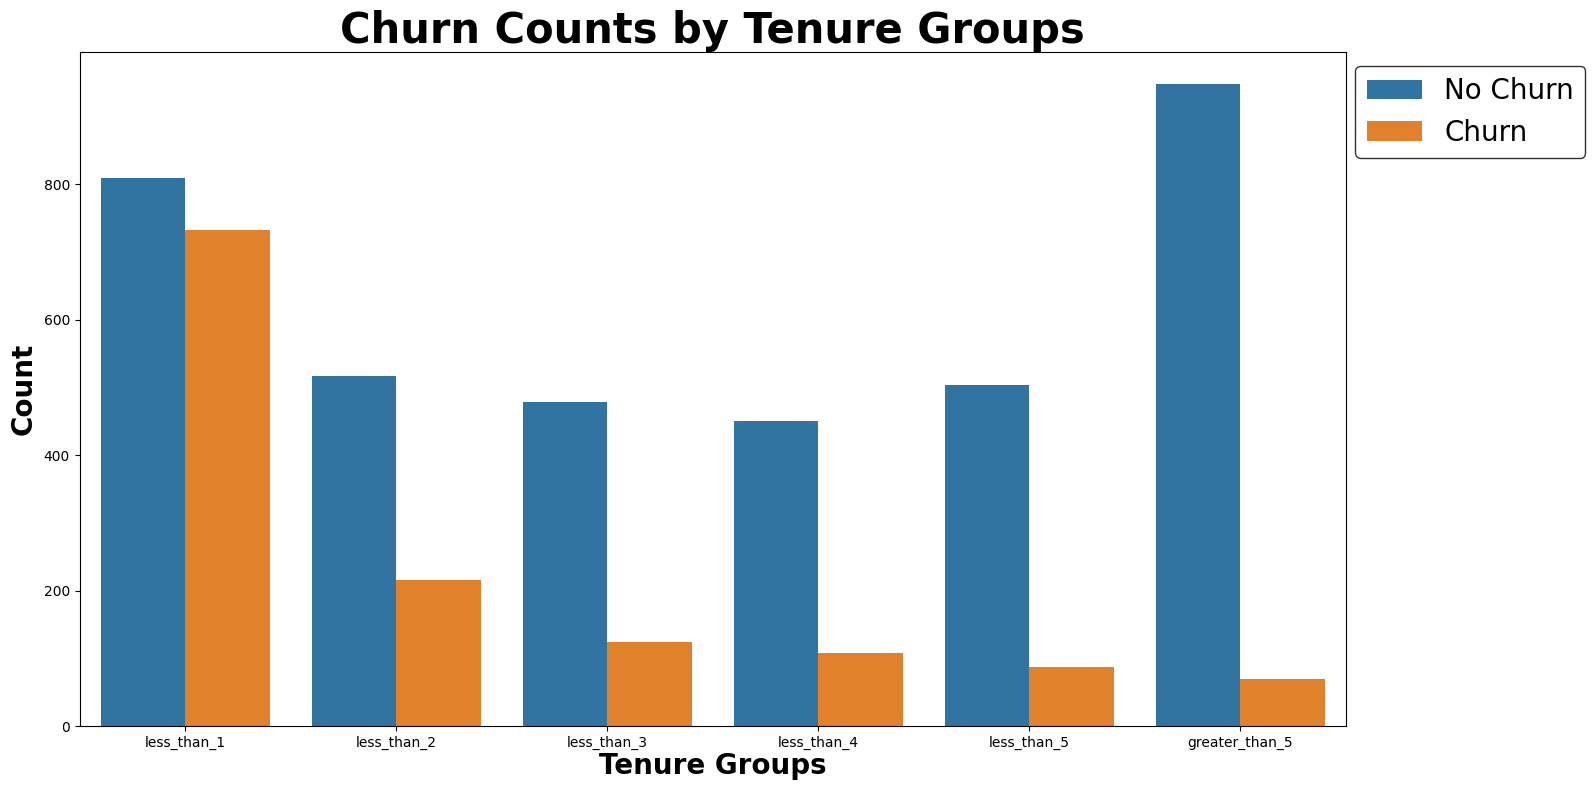

In [584]:
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)
tenure_group_counts(df)

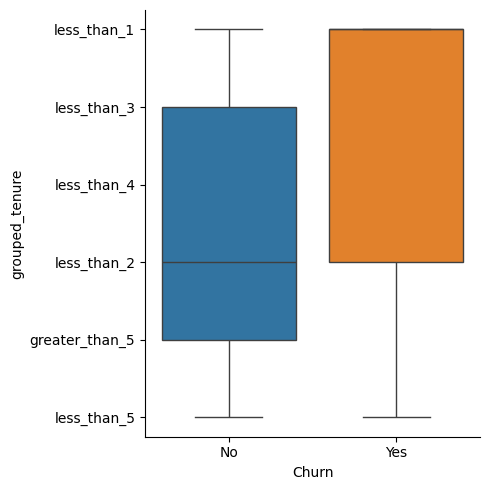

In [585]:
sns.catplot( data=train_data, x='Churn', y='grouped_tenure', kind='box', hue='Churn')

-The longer the tenure the less likely the customer is to churn,those with less than a year most likely to churn.

### Q What is the relationship between cost and churn?

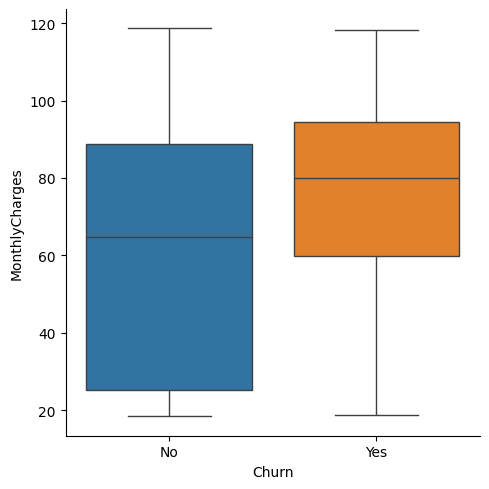

In [586]:
#plotting a box plot of churn against monthly charges i.e cost
sns.catplot( data=train_data, x='Churn', y='MonthlyCharges', kind='box', hue='Churn')

-Monthly charges affects churn, when cost gets to about $60, the chances of churn begin to shoot.

How about monthly charges against tenure?

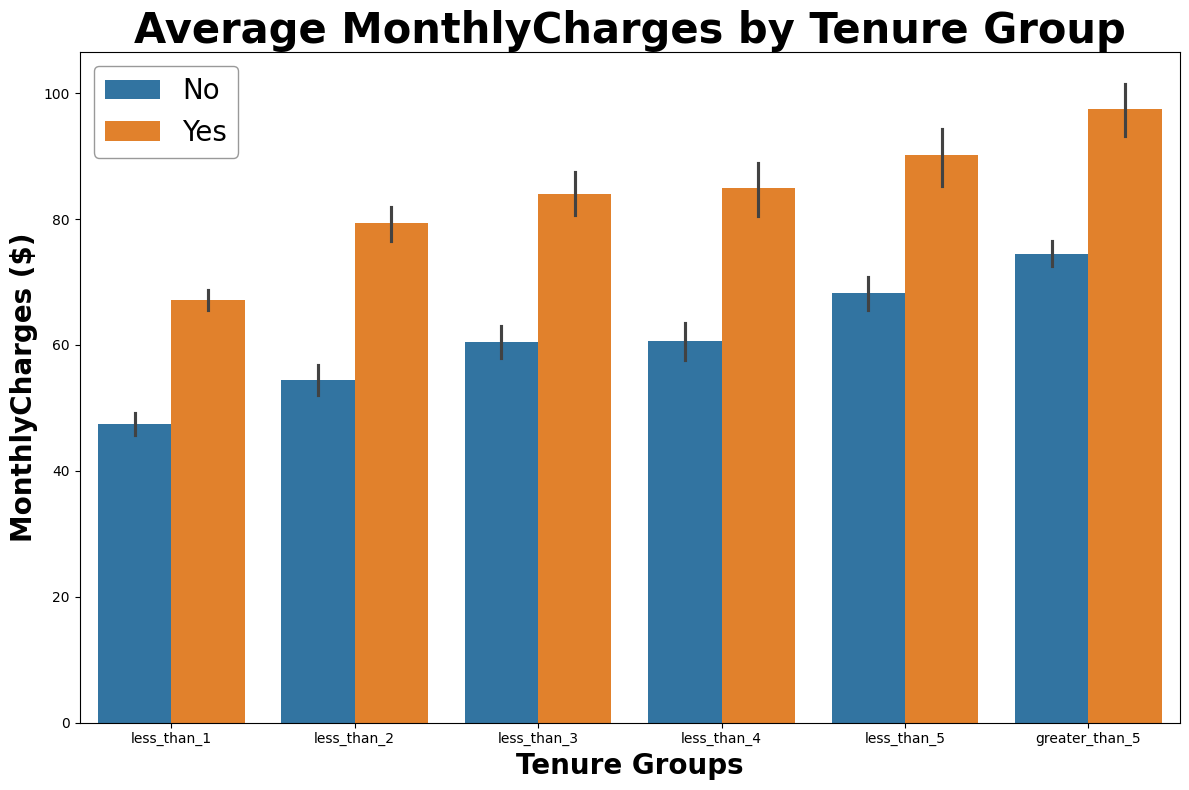

In [587]:
def plot_numerical_averages(df, feature):
    fig = plt.figure(figsize = (12, 8))
    b = sns.barplot(data = df, x = 'grouped_tenure', y = feature, hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    b.set_xlabel('Tenure Groups', fontweight = 'bold', fontsize = 20)
    b.set_ylabel(f'{feature} ($)', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average {feature} by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left', edgecolor = 'grey')
    plt.tight_layout()
plot_numerical_averages(df, 'MonthlyCharges')

-When monthly charges increases, the likelihood of churn inceases as well.

-How many customers have churned?

In [588]:
#number of customers who churned

fig= px.histogram(df,x=df['Churn'], text_auto=True, color=df['Churn'])
title=f'Number of customers who have churned'
fig.show()

-1336 customers have churned from Telco leaving 3707.

In [589]:
#Percentage of those who have churned


# Calculate percentages for those who churned or not
total_customers = len(df)
churned_customers = 1336
non_churned_customers = 3707

churned_percentage = (churned_customers / total_customers) * 100
non_churned_percentage = (non_churned_customers / total_customers) * 100

# Create the histogram
fig = go.Figure(data=[go.Bar(
    x=['Churned', 'Non-Churned'],
    y=[churned_percentage, non_churned_percentage],
    text=[f'{churned_percentage:.2f}%', f'{non_churned_percentage:.2f}%'],
    textposition='auto',
    marker_color=['red', 'blue']
)])

# Update layout
fig.update_layout(title='Percentage of customers who have churned',
                  yaxis=dict(title='Percentage'),
                  xaxis=dict(title='Churn Status'))

# Show the plot
fig.show()


-26.5% have left the organization.

-Is age a factor in churning?

In [590]:
#How age affects churn
#grouping SeniorCitizen on churn basis
age_group=df.groupby('SeniorCitizen')['Churn'].value_counts().rename('age_churn').reset_index()
age_group

,SeniorCitizen,Churn,age_churn
0,0,No,3228
1,0,Yes,996
2,1,No,479
3,1,Yes,340


<Axes: xlabel='SeniorCitizen', ylabel='count'>

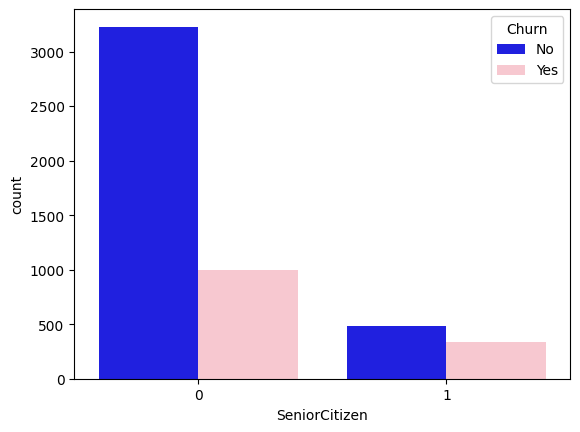

In [591]:
#count plot for age groups
sns.countplot( data=train_data, x='SeniorCitizen', hue='Churn',palette={'Yes':'Pink','No':'Blue'})

-Majority of SeniorCitizen are likely to churn probably as they retire and they don't have income or the partners and dependants leave. So,age will be a major factor to study.

-Does gender play a role in likelihood of churning?

In [592]:
#grouping gender on churn basis
grouped_gender=df.groupby('gender')['Churn'].value_counts().rename('gender_churn').reset_index()
grouped_gender
#


,gender,Churn,gender_churn
0,Female,No,1823
1,Female,Yes,661
2,Male,No,1884
3,Male,Yes,675


<Axes: xlabel='gender', ylabel='count'>

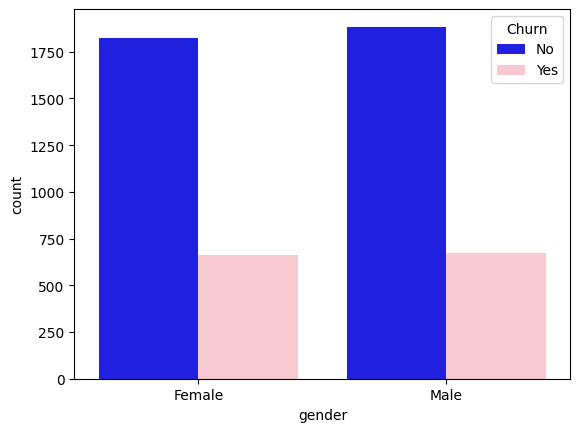

In [593]:
#plotting a visualization
sns.countplot( data=train_data, x='gender', hue='Churn',palette={'Yes':'Pink','No':'Blue'})

-Gender has nothing to do with churning

In [594]:
#Plotting for partners
grouped_partner=df.groupby('Partner')['Churn'].value_counts().rename('Partner_churn').reset_index()
grouped_partner


,Partner,Churn,Partner_churn
0,No,No,1743
1,No,Yes,842
2,Yes,No,1964
3,Yes,Yes,494


<Axes: xlabel='Partner', ylabel='count'>

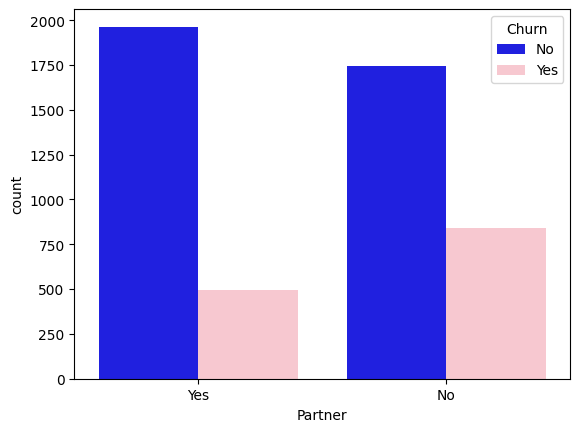

In [595]:
#plotting a visualization
sns.countplot( data=train_data, x='Partner', hue='Churn',palette={'Yes':'Pink','No':'Blue'})

Those who have no partners have a slightly higher churn rate than those who have.

In [596]:
#Checking for dependents
grouped_dependents=df.groupby('Dependents')['Churn'].value_counts().rename('family_churn').reset_index()
grouped_dependents



,Dependents,Churn,family_churn
0,No,No,2383
1,No,Yes,1099
2,Yes,No,1324
3,Yes,Yes,237


<Axes: xlabel='Dependents', ylabel='count'>

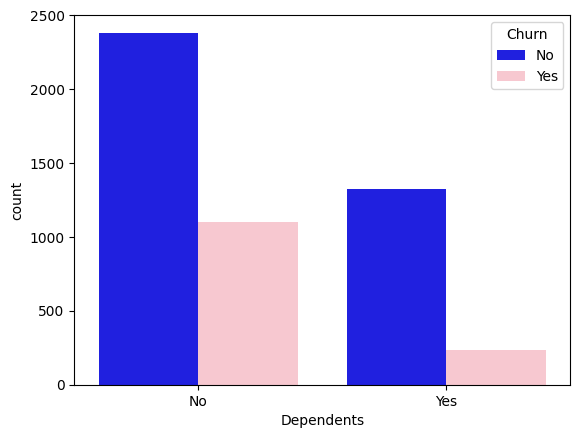

In [597]:
#plotting a visualization
sns.countplot( data=train_data, x='Dependents', hue='Churn',palette={'Yes':'Pink','No':'Blue'})

-Having dependents affect the posibility of churning

## Hypothesis testing

Ho: there is no significant relationship between cost (monthly charges) and churning

In [598]:


# cost
cost = df.groupby('MonthlyCharges')['Churn'].value_counts().rename('cost_churn').reset_index()

# Create contingency table
contingency_table = pd.pivot_table(cost, values='cost_churn', index='MonthlyCharges', columns='Churn', fill_value=0)

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print("p-value:", round(p_value, 3))


# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between cost and Churn.")
else:
    print("Failed to reject the null hypothesis. There is no significant relationship between cost and Churn.")


p-value: 0.0
Reject the null hypothesis. There is a significant relationship between cost and Churn.


## Feature Engineering

Checking for unique values, setting the target cloumns and changing values in the target columns to 0 and 1

In [599]:
#Checking for uniques
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4864
Churn                  2
grouped_tenure         6
dtype: int64

In [600]:
#Encoding target column labels
df.Churn.replace("Yes", 1, inplace=True)
df.Churn.replace("No", 0,inplace=True)

In [601]:
target_col = df['Churn']
train_df = df.drop(columns = ['Churn'])

In [602]:
#label features
features = list(set(train_df))


Data spliting into predictor and response variables.

In [603]:
X = df[features]
y = df['Churn']

In [604]:
#splitting data for test and eval

X_train,X_eval, y_train,y_eval=train_test_split(X,y ,test_size=0.3,random_state=42,stratify=y)

In [605]:
encoder= LabelEncoder()
y_train_encoded= encoder.fit_transform(y_train)
y_eval_encoded= encoder.transform(y_eval)

#### Prepare the pipelines

In [606]:
#categorical columns
cat_columns=X.select_dtypes('object').columns
cat_columns

Index(['grouped_tenure', 'PhoneService', 'OnlineBackup', 'gender',
       'MultipleLines', 'TechSupport', 'PaymentMethod', 'DeviceProtection',
       'OnlineSecurity', 'StreamingMovies', 'Dependents', 'InternetService',
       'PaperlessBilling', 'StreamingTV', 'Contract', 'Partner'],
      dtype='object')

In [607]:
#numeric columns
num_columns=X.select_dtypes('number').columns
num_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen'], dtype='object')

In [608]:
numeric_pipeline= Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_pipeline= Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False))

])

preprocessor= ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline,num_columns),
    ('cat_pipeline', categorical_pipeline, cat_columns)

])

## Modelling

In [609]:
#models list
models= [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier (random_state=42))
]
classifiers = []
#add classifiers to the list
classifiers.append(DecisionTreeClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(LogisticRegression())
classifiers.append(KNeighborsClassifier())

for classifier in classifiers:
    print(classifier)

DecisionTreeClassifier()
AdaBoostClassifier()
RandomForestClassifier()
LogisticRegression()
KNeighborsClassifier()


In [610]:
all_pipelines={}
metrics_table=pd.DataFrame(columns=['model_name','accuracy','precision','recall','f1-score'])
for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)  
    ])
    
    # Fit data to pipeline
    final_pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions
    y_pred = final_pipeline.predict(X_eval)
    
    # Calculate metrics
    metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Print model name and classification report

    #Get significant metrics
    accuracy= metrics['accuracy']
    precision= metrics['weighted avg']['precision']
    recall= metrics['weighted avg']['recall']
    f1= metrics['weighted avg']['f1-score']

    metrics_table.loc[len(metrics_table)]= [model_name, accuracy, precision, recall, f1]

metrics_table.sort_values(by='f1-score', ascending=False)
    

    

,model_name,accuracy,precision,recall,f1-score
1,Logistic Regression,0.785856,0.777756,0.785856,0.780664
4,Ada Boost,0.779247,0.771902,0.779247,0.774767
3,Random Forest,0.781229,0.771203,0.781229,0.774457
2,KNN,0.759418,0.760190,0.759418,0.759799
0,Decision Tree,0.711170,0.718897,0.711170,0.714702


In [611]:
metrics_table.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
1,Logistic Regression,0.785856,0.777756,0.785856,0.780664
4,Ada Boost,0.779247,0.771902,0.779247,0.774767
3,Random Forest,0.781229,0.771203,0.781229,0.774457
2,KNN,0.759418,0.760190,0.759418,0.759799
0,Decision Tree,0.711170,0.718897,0.711170,0.714702


## Balanced Data testing

In [612]:
#getting imlearn pipeline
from imblearn.pipeline import Pipeline as imbPipeline


#Model holder
all_balanced_pipelines={}

#confusion matrix dictionary
all_confusion_matrix= {}

#creating a dataframe to store the metrics
balanced_metrics_table=pd.DataFrame(columns=['model_name','accuracy','precision','recall','f1-score'])
for model_name, classifier in models:
    balanced_pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote_sampler', SMOTE(random_state=42)),
        ('feature_selection', SelectKBest(mutual_info_classif,k='all')),
        ('classifier', classifier)  
    ])
    
    # Fit data to pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)

    #add all pipeline into a dictionary
    all_balanced_pipelines[model_name]= balanced_pipeline
    
    # Make predictions
    y_pred = balanced_pipeline.predict(X_eval)

    #creating confusion matrix
    conf_matrix= confusion_matrix(y_eval_encoded,y_pred)
    #all confusion matrix dictionary
    all_confusion_matrix[model_name]=conf_matrix
    
    # Calculate metrics
    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Print model name and classification report

    #Get significant metrics
    accuracy= balanced_metrics['accuracy']
    precision= balanced_metrics['weighted avg']['precision']
    recall= balanced_metrics['weighted avg']['recall']
    f1= balanced_metrics['weighted avg']['f1-score']

    balanced_metrics_table.loc[len(balanced_metrics_table)]= [model_name, accuracy, precision, recall, f1]

balanced_metrics_table.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
3,Random Forest,0.775281,0.776368,0.775281,0.775811
4,Ada Boost,0.763384,0.793965,0.763384,0.772736
1,Logistic Regression,0.727032,0.791073,0.727032,0.741886
0,Decision Tree,0.719101,0.735779,0.719101,0.725892
2,KNN,0.669531,0.753178,0.669531,0.688581


In [613]:
forest_metrix=all_confusion_matrix['Random Forest']
forest_metrix

array([[939, 173],
       [167, 234]], dtype=int64)

In [614]:


# forest_confusion matrix
forest_matrix = [[939, 173], [167, 234]]  

# Extracting values from confusion matrix
tn, fp, fn, tp = forest_matrix[0][0], forest_matrix[0][1], forest_matrix[1][0], forest_matrix[1][1]

# Print confusion matrix with labels
print(f"{'':<15}{'Predicted Negative':<20}{'Predicted Positive':<20}")
print(f"{'True Negative': <15}{tn:<20}{fp: <20}")
print(f"{'False Positive': <15}{fn: <20}{tp: <20}")


               Predicted Negative  Predicted Positive  
True Negative  939                 173                 
False Positive 167                 234                 


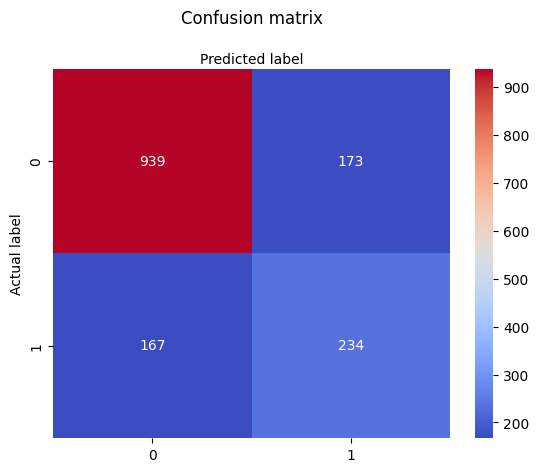

In [615]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(forest_matrix, annot=True, cmap="coolwarm" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")


In [616]:
encoder.classes_

array([0, 1], dtype=int64)

visualizing evaluation using ROC-AUC

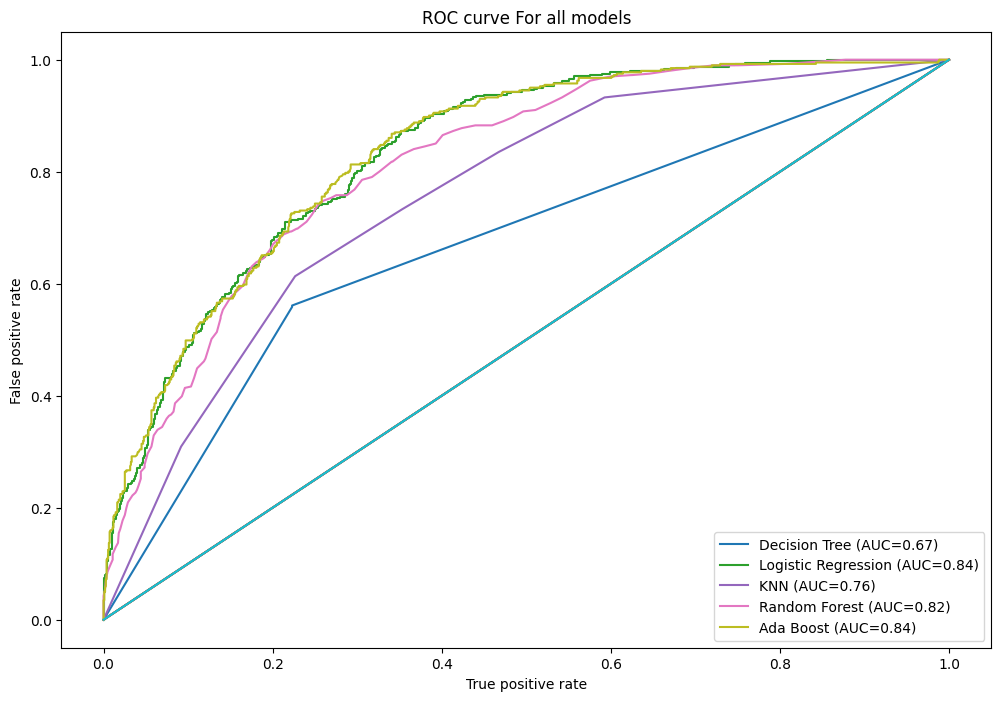

In [620]:
fig, ax= plt.subplots(figsize=(12,8))
#bring the confusion matrix loop
all_confusion_matrix= {}

#create roc data
all_roc_data= {}
# combine model pileline loop
for model_name, pipeline in all_balanced_pipelines.items():
    y_score=pipeline.predict_proba(X_eval)[:,1]
    fpr,tpr, thresholds= roc_curve(y_eval_encoded,y_score)
    roc_auc=auc(fpr,tpr)
    roc_data_df= pd.DataFrame({'False Positive rate':fpr, 'True Positive rate':tpr, 'Thresholds':thresholds})

    all_roc_data[model_name]=roc_data_df
    ax.plot(fpr,tpr, label=f'{model_name} (AUC={roc_auc:.2f})')
    ax.plot([0,1],[0,1])
    ax.set_ylabel('False positive rate')
    ax.set_xlabel('True positive rate')
    ax.set_title('ROC curve For all models')
plt.legend(loc='lower right')
plt.show()


Best performing models are; Ada Boost & Logistic Regression with 84% followed by Random Forest at 82%. These are our top three models.
- Will check the suitable thresholds for the top 3

In [623]:
#checking threshold for the first model
all_roc_data['Logistic Regression'].tail(50)

,False Positive rate,True Positive rate,Thresholds
374,0.437050,0.932668,0.286138
375,0.440647,0.932668,0.281536
376,0.440647,0.935162,0.280944
377,0.450540,0.935162,0.268969
378,0.450540,0.937656,0.268270
379,0.477518,0.937656,0.238015
380,0.477518,0.940150,0.236734
381,0.482014,0.940150,0.232057
382,0.482014,0.942643,0.231804
383,0.494604,0.942643,0.217374


Threshold of 0.16 will give 97% True positive vs 55% False positive rate. So will adopt this threshold.

In [627]:
#getting the pipeline for the model
logistic_pipeline=all_balanced_pipelines['Logistic Regression']
#using the 0.16 threshold to predict on our Logistic Regression model
threshold= 0.16
y_pred_proba= logistic_pipeline.predict_proba(X_eval)[:,1]
#use the threshold 
binary_prediction= (y_pred_proba>threshold)
threshold_matrix= confusion_matrix(y_eval_encoded, binary_prediction)
threshold_matrix


array([[503, 609],
       [ 15, 386]], dtype=int64)

<Axes: >

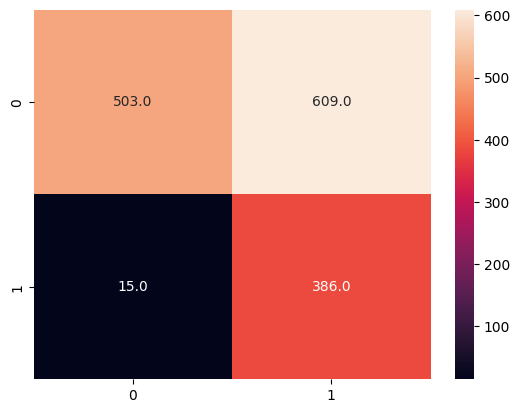

In [628]:
#visualize on a heatmap
sns.heatmap(threshold_matrix, annot=True,fmt='.1f')

#checking for Ada Boost threshold

In [648]:
#checking threshold for the second model
all_roc_data['Ada Boost'].tail(150)

,False Positive rate,True Positive rate,Thresholds
372,0.439748,0.917706,0.493530
373,0.439748,0.920200,0.493464
374,0.440647,0.920200,0.493450
375,0.442446,0.922693,0.493428
376,0.442446,0.925187,0.493426
...,...,...,...
517,0.988309,0.997506,0.326049
518,0.988309,1.000000,0.325993
519,0.996403,1.000000,0.315588
520,0.998201,1.000000,0.315581


At threshold of 0.49 we get 92% True positive against 44% False positive rate. 

In [649]:
#getting the pipeline for the model
AdaBoost_pipeline=all_balanced_pipelines['Ada Boost']
#using the 0.49 threshold to predict on our Ada Boost model
threshold= 0.49
y_pred_proba= logistic_pipeline.predict_proba(X_eval)[:,1]
#use the threshold 
binary_prediction= (y_pred_proba>threshold)
threshold_matrix= confusion_matrix(y_eval_encoded, binary_prediction)
threshold_matrix

array([[782, 330],
       [ 83, 318]], dtype=int64)

<Axes: >

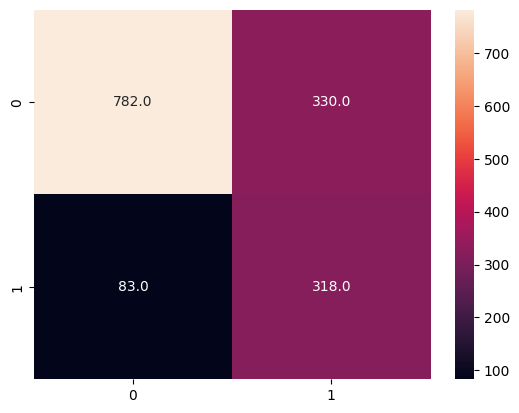

In [650]:
#Visualize on a heatmap
sns.heatmap(threshold_matrix, annot=True,fmt='.1f')

Finding threshold for the final model

In [651]:
#checking threshold for the Random Forest model
all_roc_data['Random Forest'].tail(50)

,False Positive rate,True Positive rate,Thresholds
57,0.200540,0.670823,0.430000
58,0.205935,0.678304,0.420000
59,0.206835,0.678304,0.416000
60,0.213129,0.688279,0.410000
61,0.221223,0.693267,0.400000
62,0.222122,0.693267,0.393333
63,0.228417,0.698254,0.390000
64,0.229317,0.698254,0.386667
65,0.240108,0.710723,0.380000
66,0.246403,0.723192,0.370000


at threshold of 0.26 we get 83% true positive and 35% False positive.

In [652]:
#getting the pipeline for the model
forest_pipeline=all_balanced_pipelines['Random Forest']
#using the 0.26 threshold to predict on our Random Forest model
threshold= 0.26
y_pred_proba= logistic_pipeline.predict_proba(X_eval)[:,1]
#use the threshold 
binary_prediction= (y_pred_proba>threshold)
threshold_matrix= confusion_matrix(y_eval_encoded, binary_prediction)
threshold_matrix

array([[601, 511],
       [ 25, 376]], dtype=int64)

<Axes: >

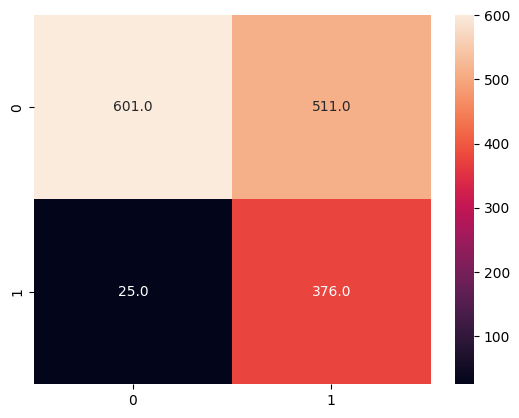

In [653]:
#visualize on heatmap
sns.heatmap(threshold_matrix, annot=True,fmt='.1f')